In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

1-Chargement des données

In [14]:
df=pd.read_csv('social_media_vs_productivity.csv')
df.head(10)

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
5,38,Male,Finance,1.512568,Twitter,50,6.429312,NaN,4.081026,5.0,5.515251,1.518612,5,False,True,5,2,0.000000,4.568728
6,56,Female,Unemployed,4.381070,TikTok,60,3.902309,6.420989,5.976408,7.0,7.549849,2.252624,4,False,False,4,20,24.084905,5.501373
7,36,Female,Education,4.089168,Twitter,49,6.560467,2.681830,2.446927,4.0,6.325507,0.747998,2,False,False,4,29,8.419648,3.444376
8,40,Female,Education,4.097401,Instagram,57,5.839590,3.219022,3.004240,4.0,NaN,0.000000,10,False,True,2,10,0.000000,1.960131
9,28,Other,IT,7.595577,Twitter,64,5.888936,NaN,NaN,3.0,6.761952,1.449841,10,False,False,1,18,6.959377,6.808102


2-Comprendre la structure des données

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [5]:
df.describe()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,27235.000000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000.000000,30000.000000,30000.000000,27270.000000
mean,41.486867,3.113418,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901
std,13.835221,2.074813,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,1.410047,9.252956,7.280415,2.121194
min,18.000000,0.000000,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.639566,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,1.000000,8.000000,4.541872,3.363580
50%,41.000000,3.025913,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,2.000000,16.000000,10.013677,4.951049
75%,53.000000,4.368917,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,3.000000,24.000000,15.300809,6.581323
max,65.000000,17.973256,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000


3-Approches statistiques: Pour les valeurs catégorielles, nous allons utiliser des graphiques à barres pour visualiser la distribution des différentes catégories. Pour les valeurs numériques, nous allons utiliser des histogrammes pour visualiser la distribution des données.

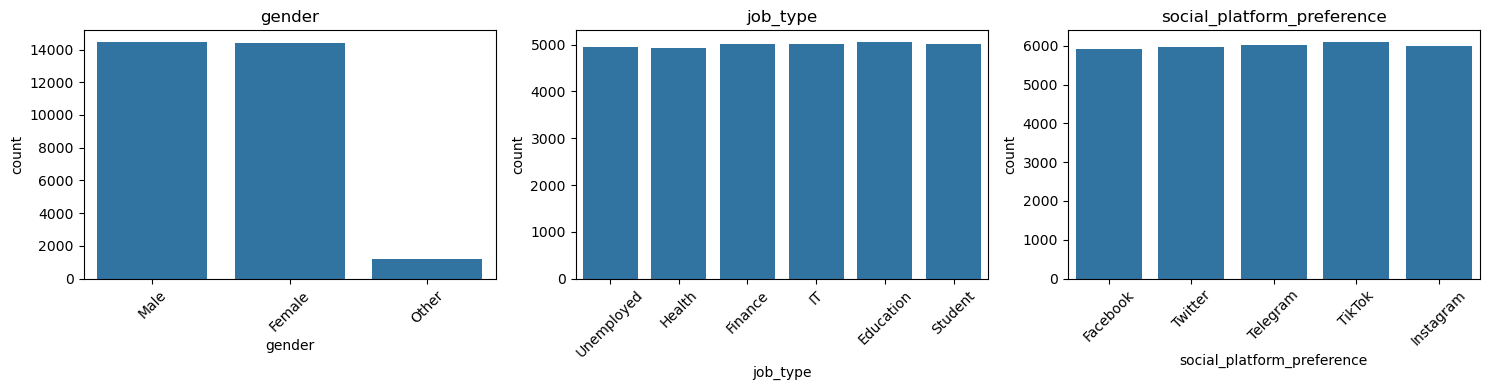

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
cols = ['gender', 'job_type', 'social_platform_preference']
for ax, col in zip(axes, cols):
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

On peut remarquer que le dataset est assez équilibré sur la parité, le type de travail et le type de réseaux sociaux de référence des utilisateurs.

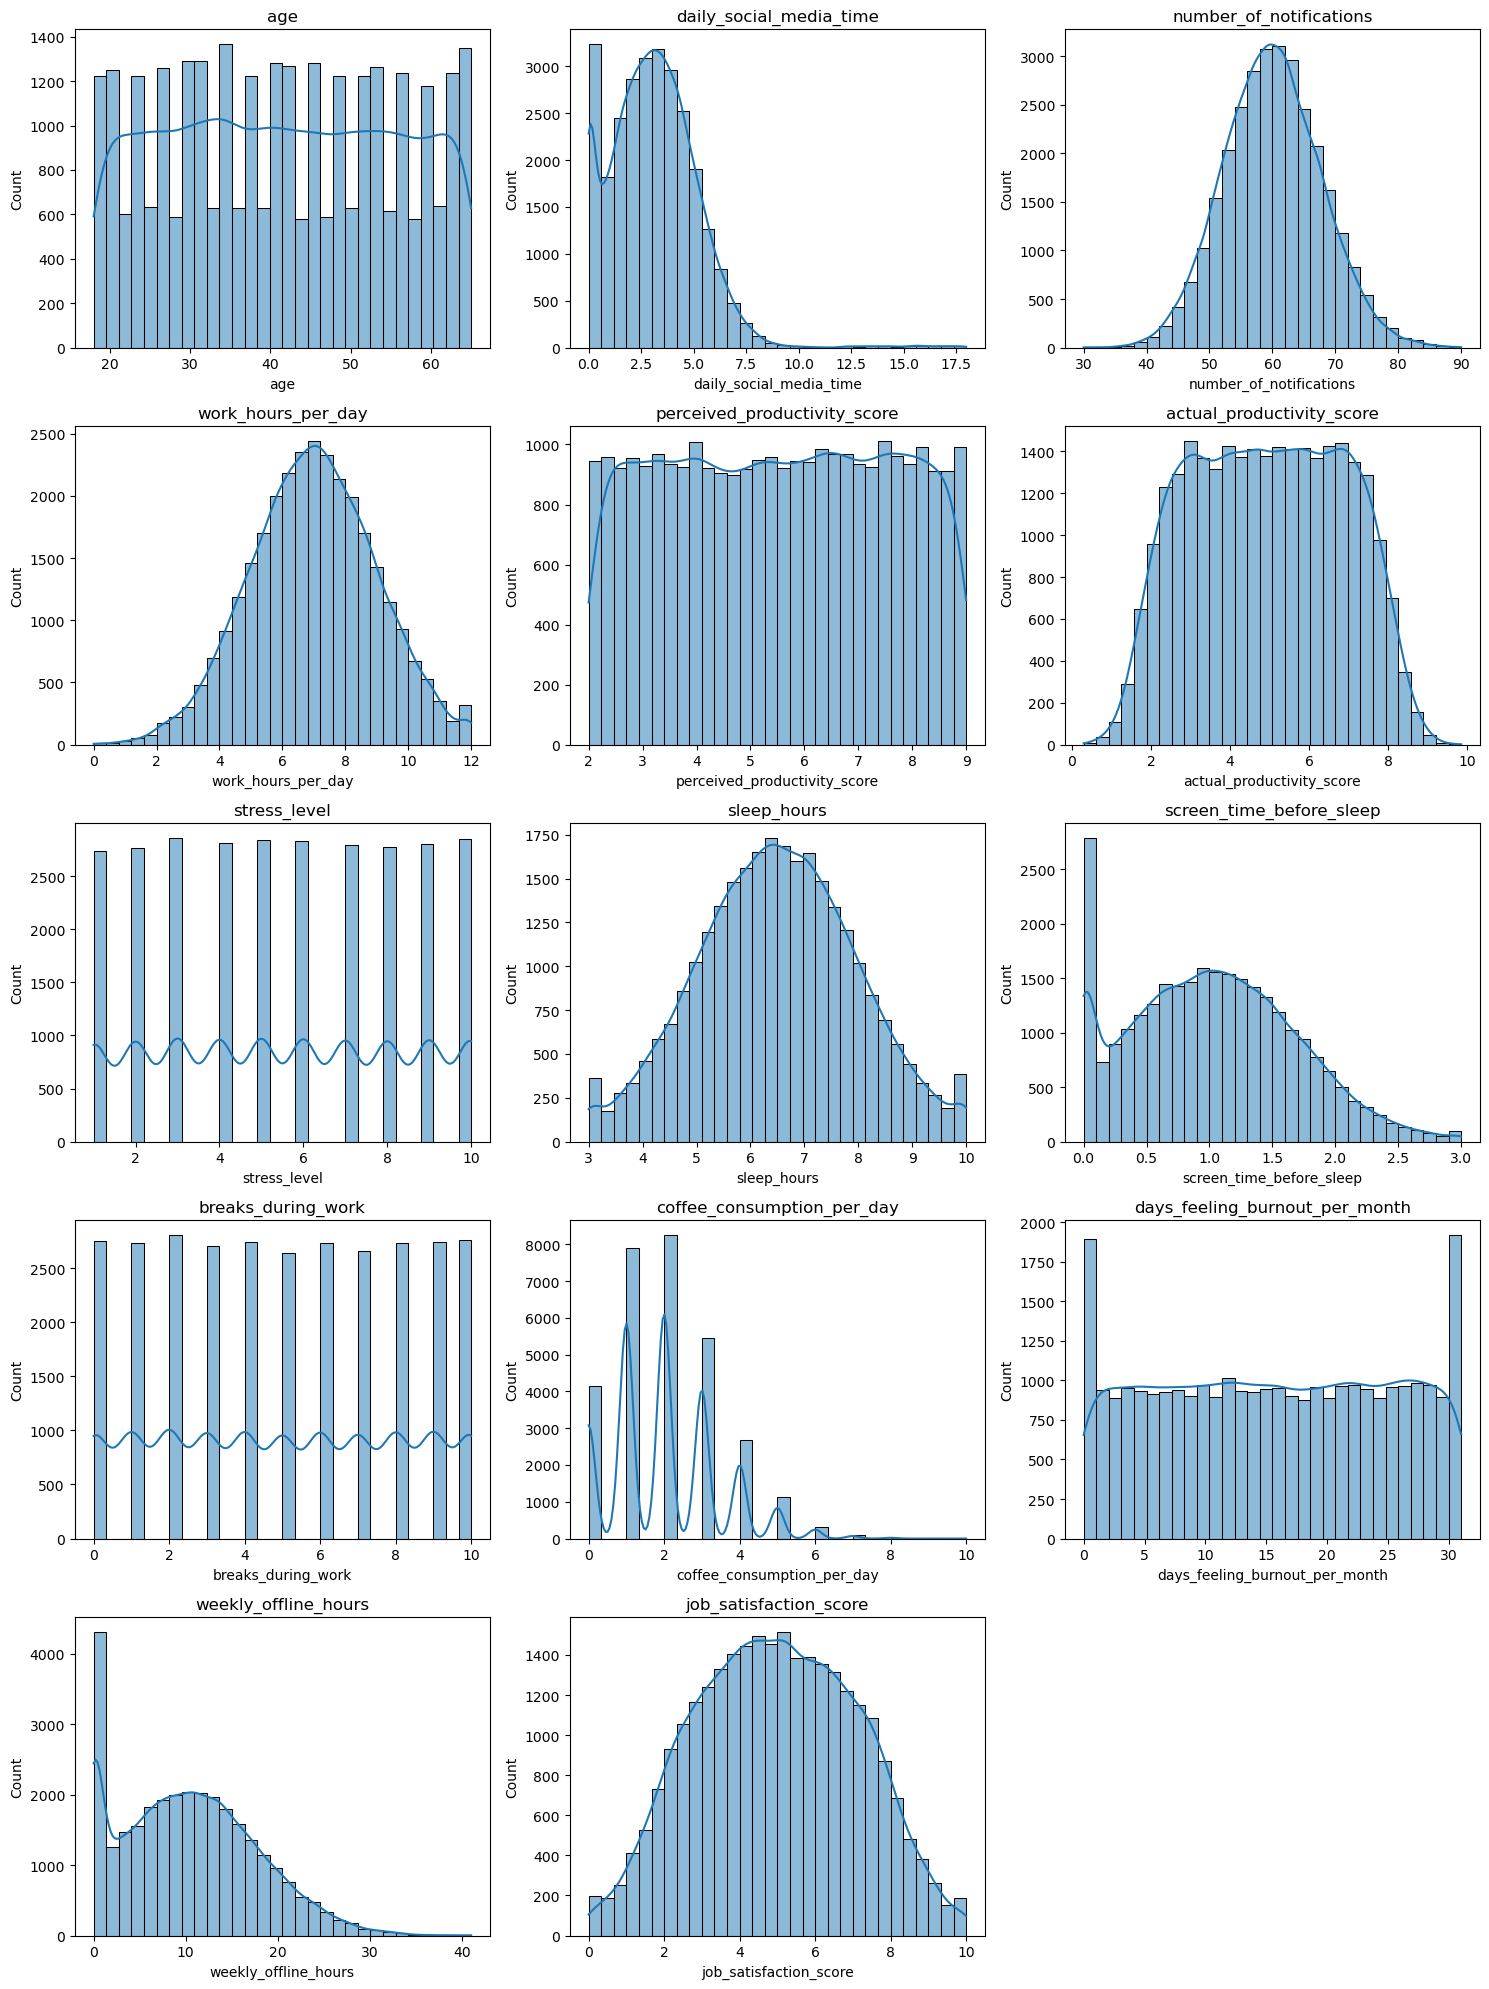

In [21]:
cols = ['age','daily_social_media_time','number_of_notifications', 'work_hours_per_day', 'perceived_productivity_score', 'actual_productivity_score', 'stress_level', 'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps', 'has_digital_wellbeing_enabled', 'coffee_consumption_per_day', 'days_feeling_burnout_per_month', 'weekly_offline_hours', 'job_satisfaction_score']
available = [c for c in cols if c in df.columns]
num_cols = df[available].select_dtypes(include=[np.number]).columns.tolist()

n = len(num_cols)
cols_per_row = 3
nrows = (n + cols_per_row - 1) // cols_per_row
fig, axes = plt.subplots(nrows, cols_per_row, figsize=(cols_per_row*5, nrows*4))
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
for ax, col in zip(axes, num_cols):
        sns.histplot(data=df, x=col, kde=True, bins=30, ax=ax, color='C0')
        ax.set_title(col)
for ax in axes[len(num_cols):]:
        ax.set_visible(False)
plt.tight_layout()
plt.show()

4-Détecter les doublons 

In [ ]:
df.duplicated().sum()

np.int64(0)

Aucun doublon détécté.

5-Détecter les valeurs manquantes

In [7]:
df.isnull().sum()

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

6-Détecter les valeurs aberrantes 

<Axes: xlabel='age'>

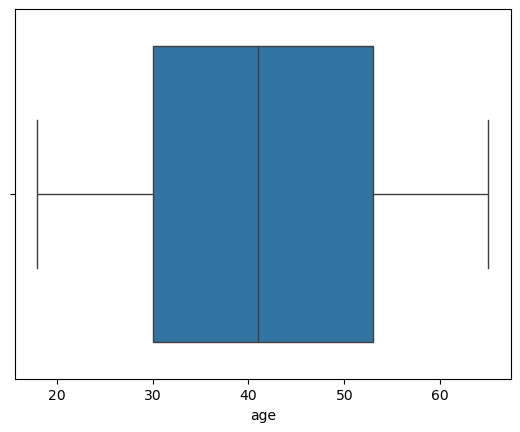

In [16]:
sns.boxplot(x="age", data=df)

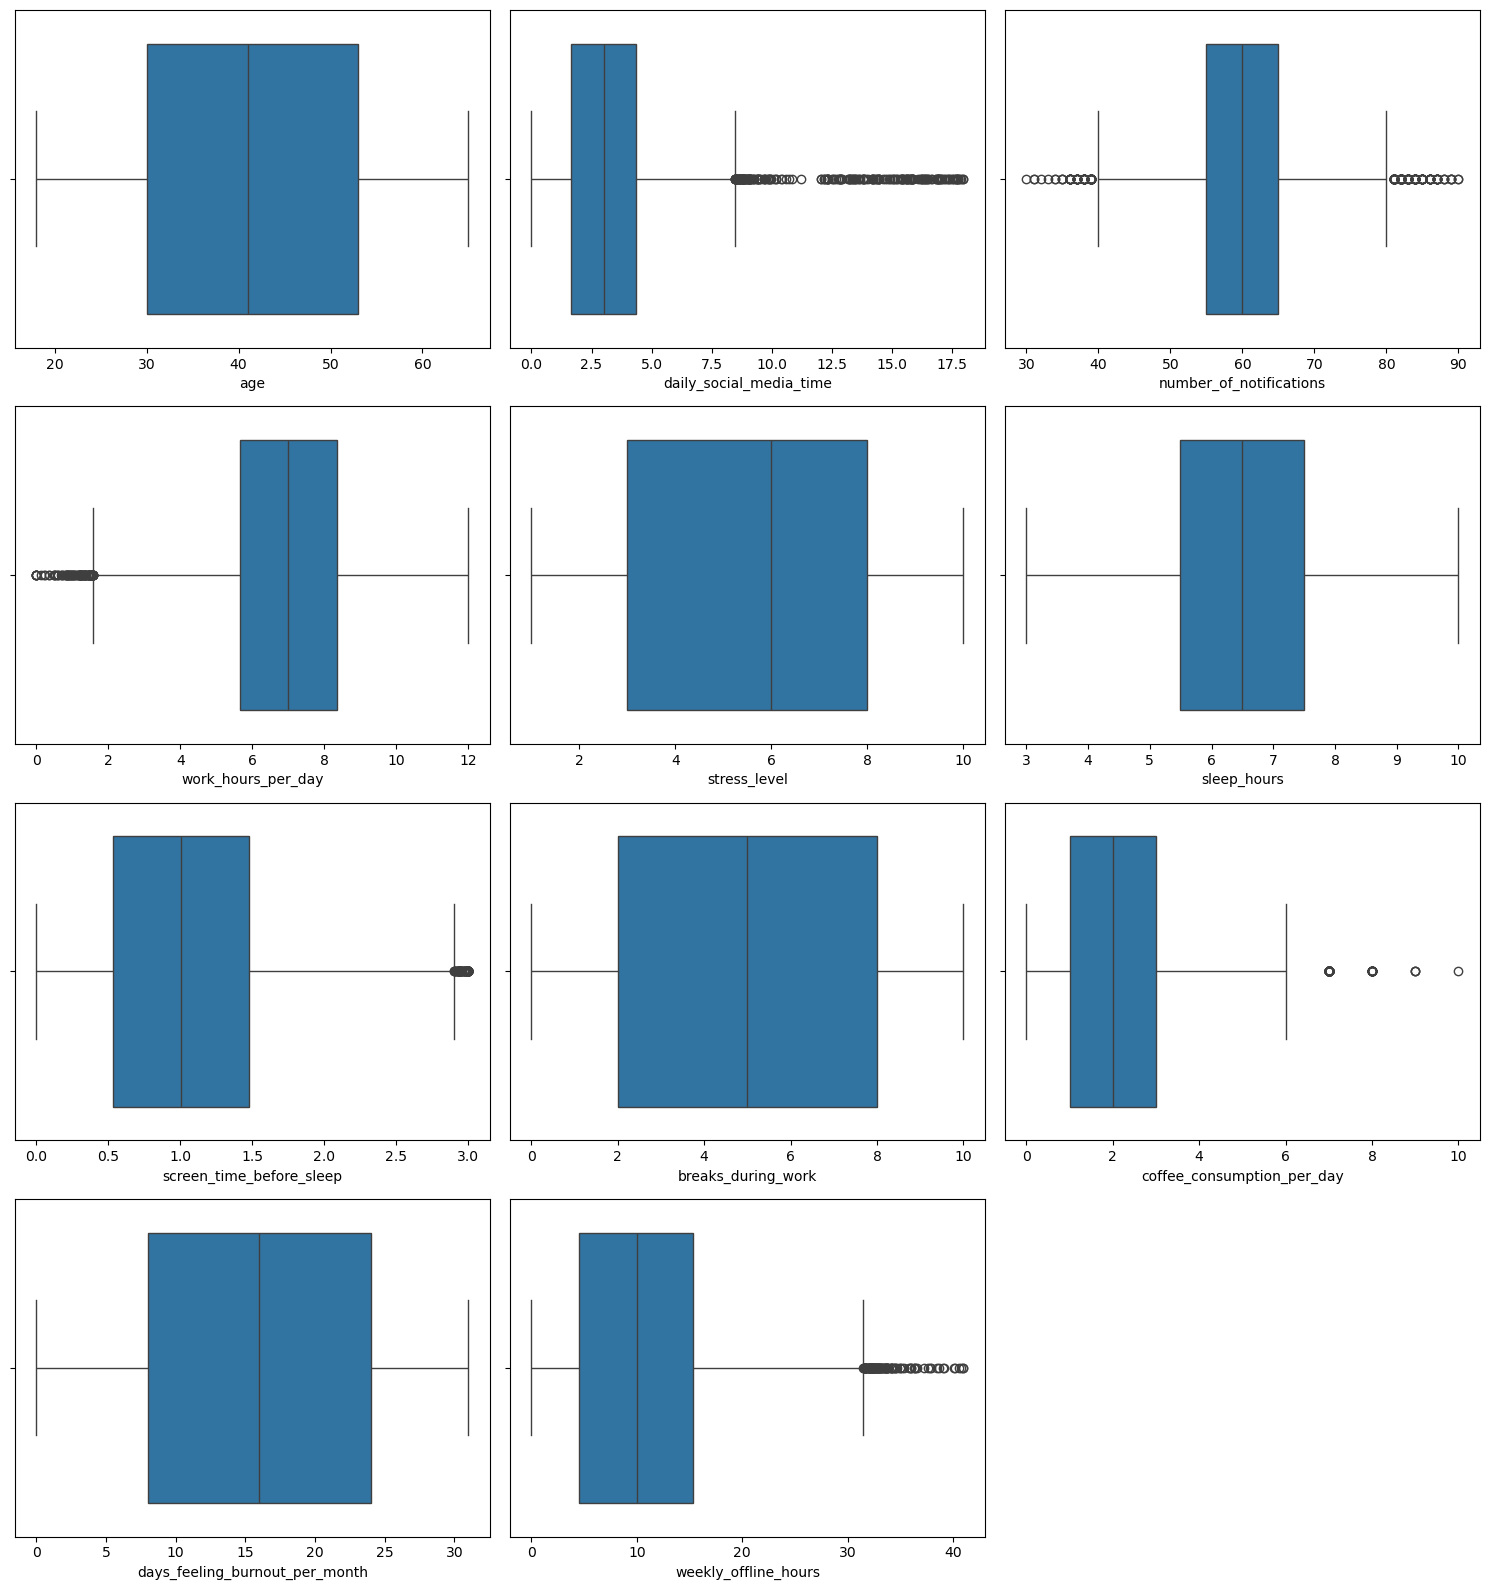

In [26]:
cols = ['age','daily_social_media_time','number_of_notifications', 'work_hours_per_day', 'stress_level', 'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps', 'has_digital_wellbeing_enabled', 'coffee_consumption_per_day', 'days_feeling_burnout_per_month', 'weekly_offline_hours']
available = [c for c in cols if c in df.columns]
num_cols = df[available].select_dtypes(include=[np.number]).columns.tolist()

n = len(num_cols)
cols_per_row = 3
nrows = (n + cols_per_row - 1) // cols_per_row
fig, axes = plt.subplots(nrows, cols_per_row, figsize=(cols_per_row*5, max(1, nrows)*4))
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
for ax, col in zip(axes, num_cols):
        sns.boxplot(x=df[col], ax=ax)
for ax in axes[len(num_cols):]:
        ax.set_visible(False)
plt.tight_layout()
plt.show()

Données aberrantes: Un temps passé sur les réseaux sociaux supérieur à 15 heures. 
Outliers: moins de 2 heures de travail par jour, plus de 30 heures par jour déconnecté des réseaux sociaux en excluant le temps de sommeil. 
Ces données ne seront pas prises en compte pour notre étude car elles peuvent etre associées à un type de profil qui n'utilise pas les réseaux sociaux ou qui est au chomage.

7-Vérifier le typage

In [22]:
df.dtypes

age                                 int64
gender                             object
job_type                           object
daily_social_media_time           float64
social_platform_preference         object
number_of_notifications             int64
work_hours_per_day                float64
perceived_productivity_score      float64
actual_productivity_score         float64
stress_level                      float64
sleep_hours                       float64
screen_time_before_sleep          float64
breaks_during_work                  int64
uses_focus_apps                      bool
has_digital_wellbeing_enabled        bool
coffee_consumption_per_day          int64
days_feeling_burnout_per_month      int64
weekly_offline_hours              float64
job_satisfaction_score            float64
dtype: object

8-Gestion des valeurs aberrantes et des outliers

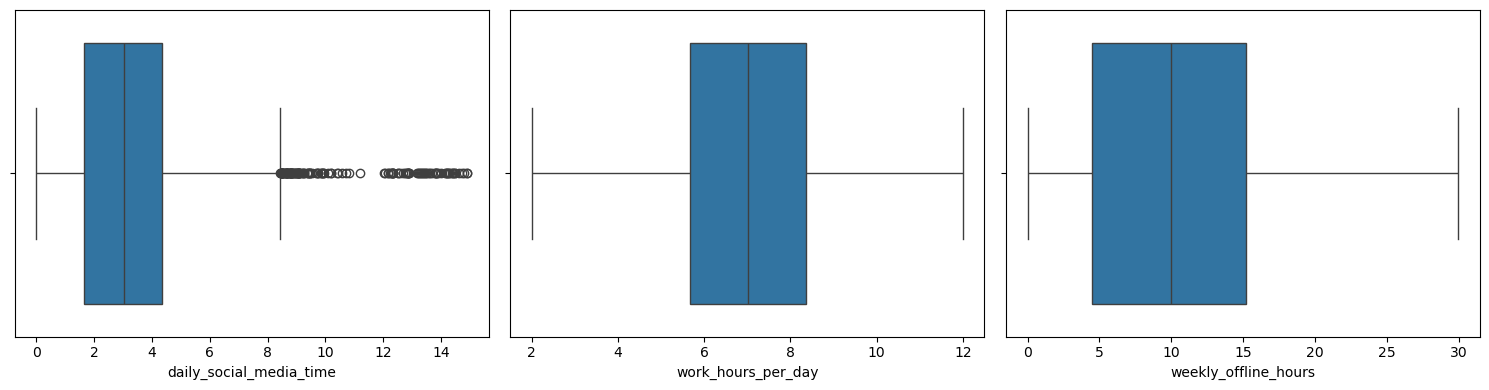

In [10]:
df = df.drop(df[df['daily_social_media_time']>15].index)
df=df.drop(df[df['work_hours_per_day']<2].index)
df=df.drop(df[df['weekly_offline_hours']>30].index)
cols = ['daily_social_media_time','work_hours_per_day','weekly_offline_hours']
available = [c for c in cols if c in df.columns]
num_cols = df[available].select_dtypes(include=[np.number]).columns.tolist()

n = len(num_cols)
cols_per_row = 3
nrows = (n + cols_per_row - 1) // cols_per_row
fig, axes = plt.subplots(nrows, cols_per_row, figsize=(cols_per_row*5, max(1, nrows)*4))
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
for ax, col in zip(axes, num_cols):
        sns.boxplot(x=df[col], ax=ax)
for ax in axes[len(num_cols):]:
        ax.set_visible(False)
plt.tight_layout()
plt.show()

9-Cas des valeurs manquantes

In [11]:
df['daily_social_media_time'].fillna(df['daily_social_media_time'].median(), inplace=True)
df['stress_level'].fillna(df['stress_level'].median(), inplace=True)
df['sleep_hours'].fillna(df['sleep_hours'].median(), inplace=True)
df['screen_time_before_sleep'].fillna(df['screen_time_before_sleep'].median(), inplace=True)

C:\Users\mrand\AppData\Local\Temp\ipykernel_15816\830817116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['daily_social_media_time'].fillna(df['daily_social_media_time'].median(), inplace=True)
C:\Users\mrand\AppData\Local\Temp\ipykernel_15816\830817116.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

10-Matrice de correlation

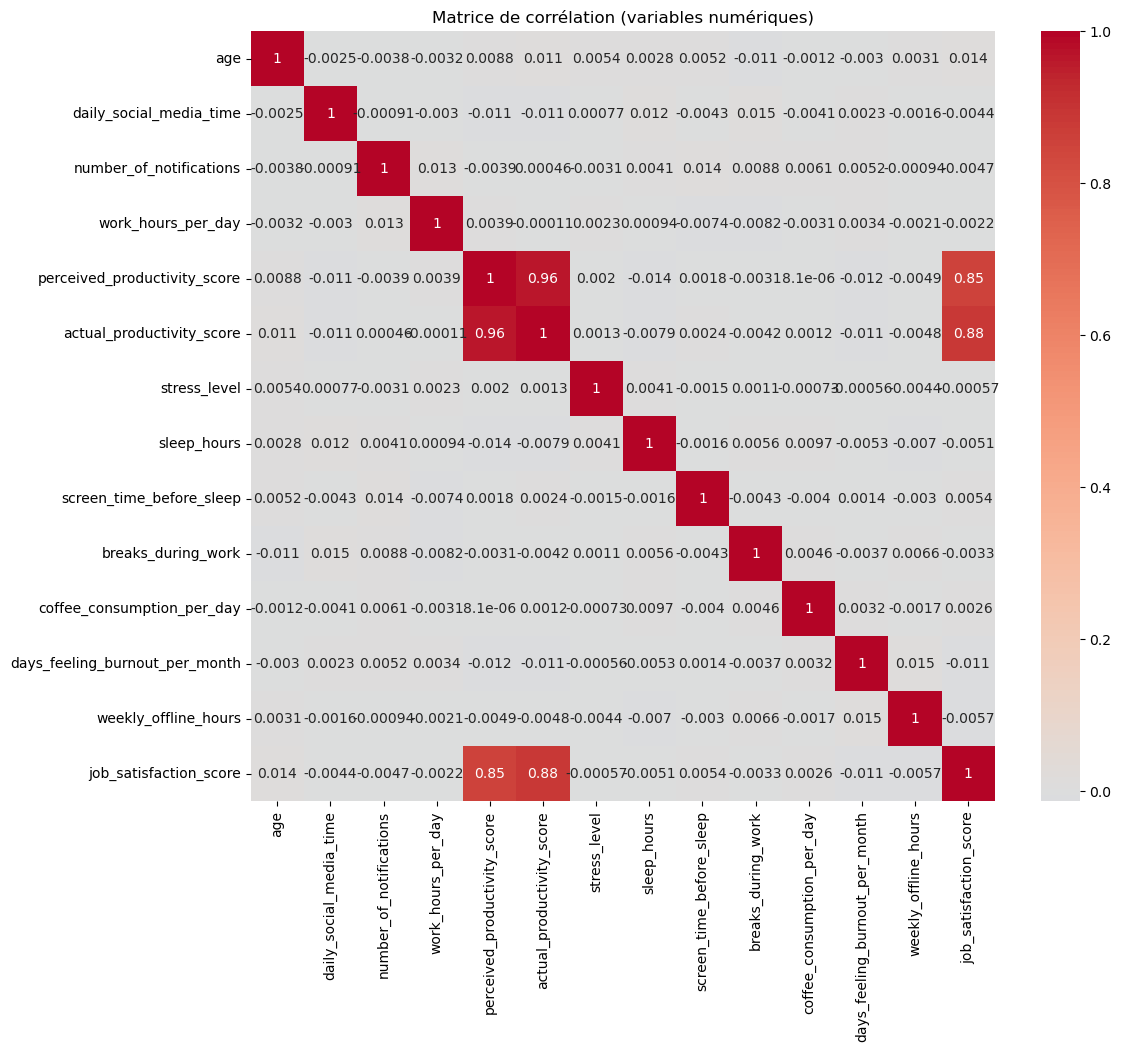

In [8]:
# Calcul et affichage de la matrice de corrélation
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation (variables numériques)')
plt.show()

La matrice de correlation permet de comparer les colonnes pour trouver celles dont les informations extraites peuvent avoir un lien. Celles qui ont une grande correlation sont la satisfaction au travail et la productivité.

11-Preprocessing

On standardise l'age, les valeurs en heures et en jours pour qu'elles puissent etre exprimées dans un ordre de grandeur équivalent avec une moyenne ramenée à 0. 
Les valeurs discrètes sont 'number_of_notifications', 'days_feeling_burnout_per_month' et les valeurs continues sont 'daily_social_media_time', 'work_hours_per_day', 'sleep_hours', 'screen_time_before_sleep', 'weekly_offline_hours'.

Pour les valeurs catégorielles, on utilise un encodage en OneHotEncoding, comme ce sont des valeurs nominales et qu'elles ont chacune moins de 6 valeurs. Elles ne suscitent aucun ordre naturel.

In [16]:
num_features = ['age', 'daily_social_media_time', 'number_of_notifications', 'work_hours_per_day', 'sleep_hours', 'screen_time_before_sleep', 'days_feeling_burnout_per_month', 'weekly_offline_hours']
cat_features = ['gender', 'job_type', 'social_platform_preference']

numeric_pipeline = Pipeline([('num_imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_pipeline = Pipeline([('cat_features', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_pipeline, num_features), ('cat', categorical_pipeline, cat_features)])

Vérifier la standardisation

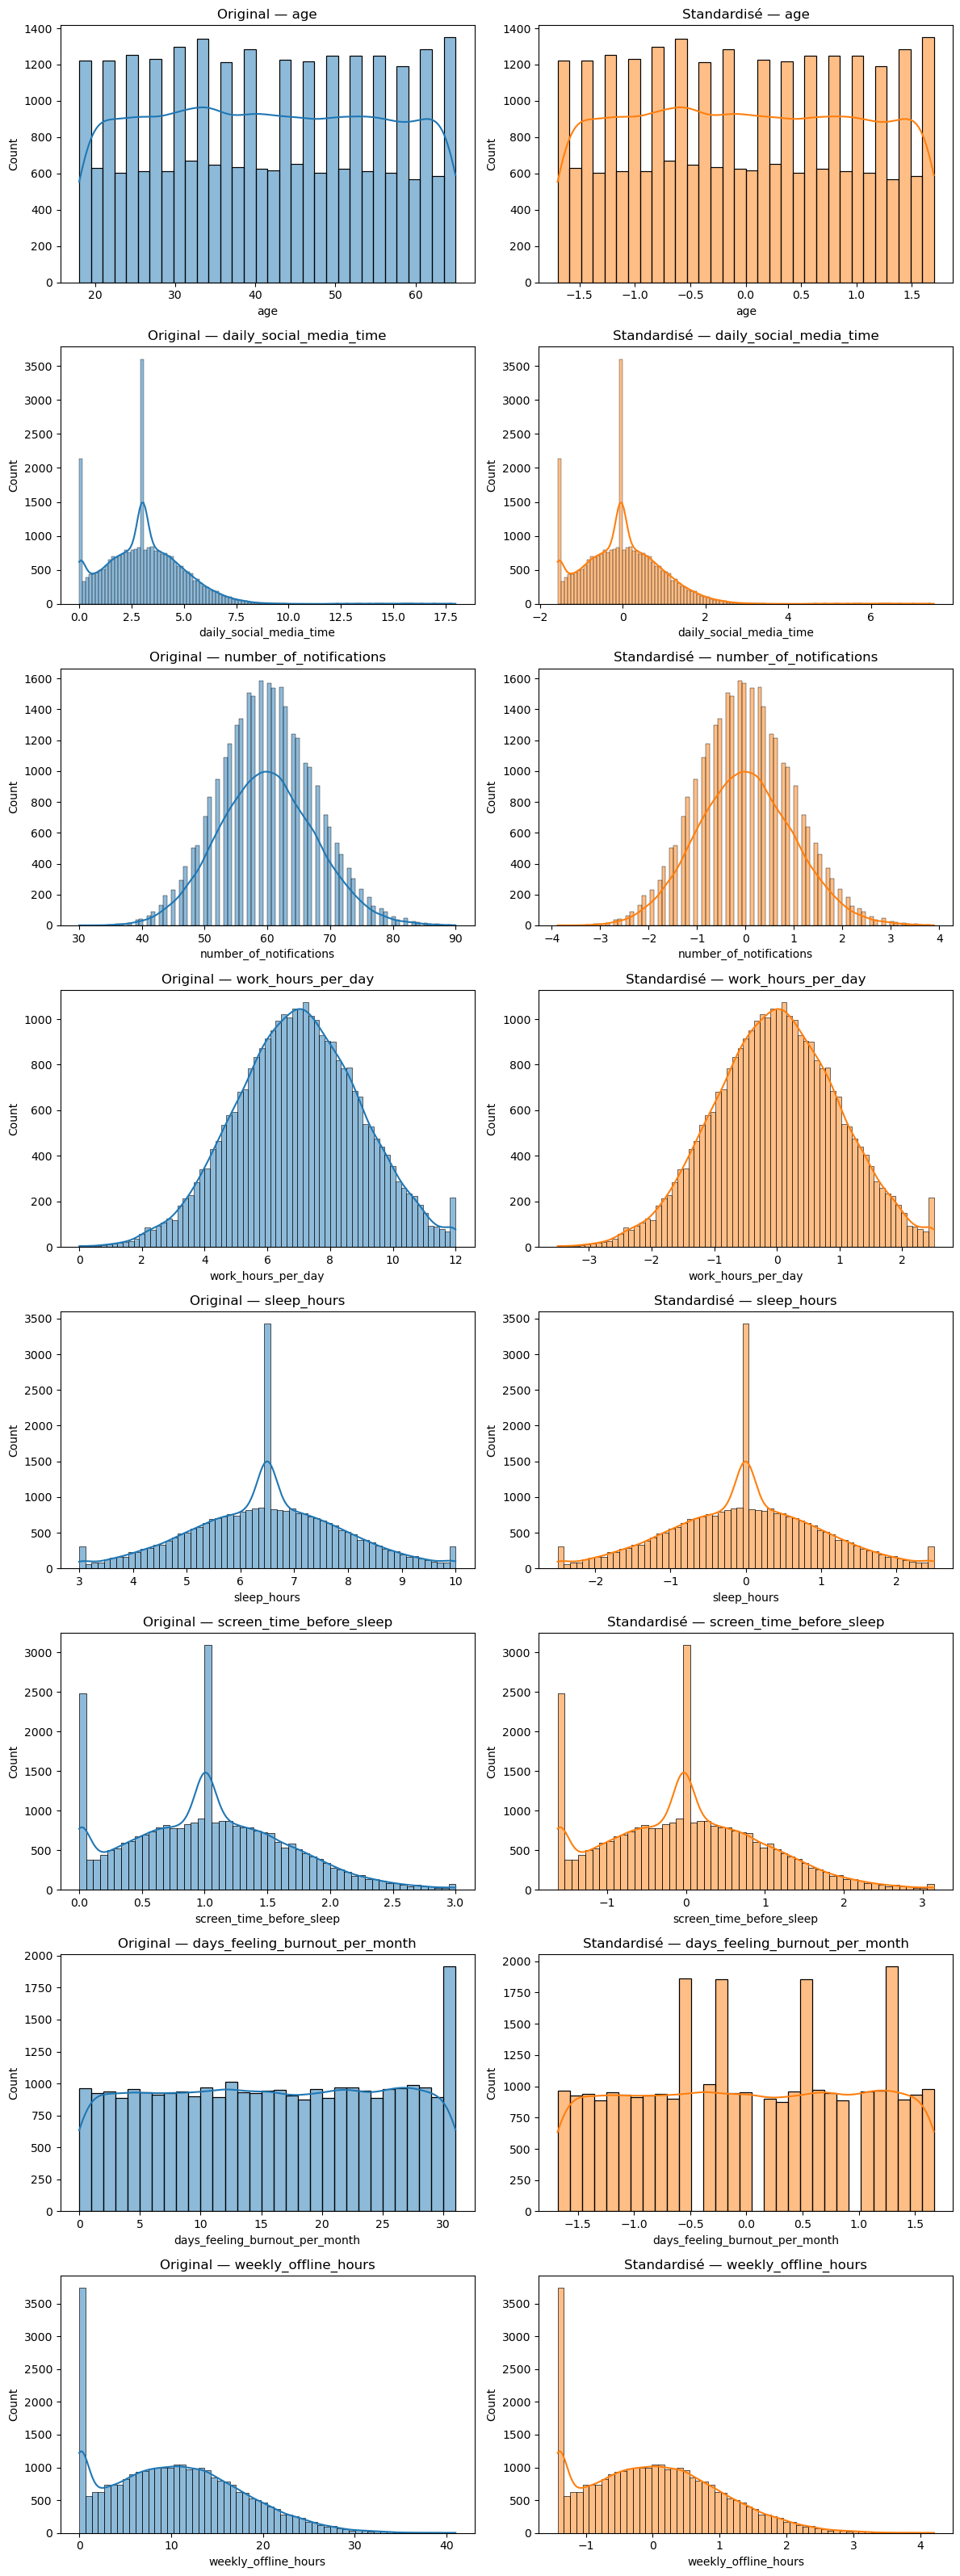

In [20]:
num_features = ['age', 'daily_social_media_time', 'number_of_notifications', 'work_hours_per_day', 'sleep_hours', 'screen_time_before_sleep', 'days_feeling_burnout_per_month', 'weekly_offline_hours']
num_features = [c for c in num_features if c in df.columns]
X = df[num_features].copy()
X_imputed = X.fillna(X.median())
scaler = numeric_pipeline.named_steps['scaler']
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=num_features)

n = len(num_features)
fig, axes = plt.subplots(n, 2, figsize=(12, 4*n))
if n == 1:
    axes = axes.reshape(1,2)
for i, col in enumerate(num_features):
    sns.histplot(X_imputed[col], kde=True, ax=axes[i,0], color='C0')
    axes[i,0].set_title(f'Original — {col}')
    sns.histplot(X_scaled[col], kde=True, ax=axes[i,1], color='C1')
    axes[i,1].set_title(f'Standardisé — {col}')
plt.tight_layout()
plt.show()